<a href="https://colab.research.google.com/github/RadhavaramHarika/Harika_INFO5731_Spring2020/blob/master/INFO5731_Group_1_Final_Project_Harika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#!pip install textblob
!pip install pyspellchecker
import os, string, csv, io ,re
from google.colab import drive,files
import spacy
from gensim.corpora import Dictionary
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from spellchecker import SpellChecker
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob,Word
import pandas as panda
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as nump

nlp = spacy.load("en_core_web_sm")

#Using functions for collecting extracted texts
def textContent():
    drive.mount('/content/gdrive')
    file_list = os.listdir('/content/gdrive/My Drive/Colab Notebooks/Extracted_texts')
    #filenames = os.listdir('https://github.com/NikhithaKunati/Applies_NLP_on_Project_Management/tree/master/*.docx')
    print(file_list)
    os.chdir('/content/gdrive/My Drive/Colab Notebooks/Extracted_texts')
        
    projectBackground = []
    successFactors = []
    shortcomings = []
    lessonslearned = []
    for i in range(len(file_list)):
      csvFile = open(file_list[i],'r')
      content = csv.reader(csvFile)
      if file_list[i] == 'ProjectFileData.csv': 
        next(content)   
        for each in content:
          projectBackground.append(each)
      
      elif file_list[i] == 'factors.csv':
        for row in content:
          successFactors.append(' '.join(row))
      elif file_list[i] == 'shortcomings.csv':
        for row in content:
          shortcomings.append(' '.join(row))
      else:
        for row in content:
          lessonslearned.append(' '.join(row))
      
      csvFile.close()
          
    return (projectBackground,successFactors,shortcomings,lessonslearned)

#Using functions to cleaning and preprocessing the dataset

#Function to remove all punctuations in each project report's text data
def removePunctuations(textList):
    withNoPunct = []
    transltr_table = str.maketrans('','',string.punctuation)
    for each in textList:
        each_noPunct= re.sub(r"\W"," ",each.lower().strip().translate(transltr_table))
        withNoPunct.append(each_noPunct)
    return withNoPunct

#Function to remove all numbers in the text
def removingNumbers(textList):
  noNum = []
  for each in textList:
    each = re.sub(r"\d+","",each)
    noNum.append(each)
  return noNum

#Function to split each project report's text data into tokens/words
def textTokens(textList):
    tokens = []
    for each in textList:
        sp_tokens = nlp(each)
        tblob = TextBlob(each)
        tokens.append([each for each in sp_tokens])
    return tokens

#Function to remove all stopwords in 'English' language in each project report
def removeStopWords(textTokenList):
  stop_words = stopwords.words("english")
  withnostops = []
  for each_list in textTokenList:
    withnostops.append([tokens for tokens in each_list
                    if tokens.text not in stop_words])

  return withnostops

#Function to remove most frequently occurred 5 words and most rarely occurred 5 words in each project report
def freq_rare_words(textTokenList):
  withnofreqRare = []
  for each_list in textTokenList:
    temp = []
    freq_dist = nltk.FreqDist([each.text for each in each_list])
    freqwords = [each[0] for each in freq_dist.most_common(5)]
    rarewords = [each[0] for each in freq_dist.most_common()[-5:]]
    for token in each_list:
      if token.text not in freqwords:
        if token.text not in rarewords:
          temp.append(token)
    withnofreqRare.append(temp)

  return withnofreqRare

#Function to remove all spelling mistakes in 'English' language from each project report's text data
def spellChecking(textTokenList):
  correctedTokens = []
  for each_list in textTokenList:
    spell = SpellChecker()
    correctedTokens.append([spell.correction(token.text) for token in each_list])
  return correctedTokens

#Function to convert each word/token into its root word from all project reports
def stemming(textTokenList):
  with_stemming = []
  lancaster = LancasterStemmer()
  for each_list in textTokenList:
    with_stemming.append([lancaster.stem(tokens) for tokens in each_list])
  return with_stemming

#Function to convert each word/token into its lemmatized word based on the POS tag from all project reports
def lemmatized(textTokenList):
  with_lemmas = []
  for each_list in textTokenList:
    lemmatizer = WordNetLemmatizer()
    with_lemmas.append(' '.join([token.lemma_ for token in each_list]))
   # with_lemmas.append(' '.join([lemmatizer.lemmatize(token) for token in each_list]))
  return with_lemmas

#Function to upload all the preprocessed data in all project reports into csv file using dataframe 
def uploadToCSV(projDocData):
  noPunct = removePunctuations(projDocData)
  removedNumbers = removingNumbers(noPunct)
  tokens = textTokens(removedNumbers)
  no_stopwords = removeStopWords(tokens)
  no_freqrare = freq_rare_words(no_stopwords)
  correctedWords = spellChecking(no_freqrare)
  stemmed = stemming(correctedWords)
  lemmas = lemmatized(no_freqrare)

  datafrm = panda.DataFrame({"Project data": projDocData,
                            "Removed Punctuations":noPunct,
                            "No Numbers":removedNumbers,
                            "Tokens":tokens,
                            "No stopwords":no_stopwords,
                            "No Frequent or Rare words":no_freqrare,
                            "With spell check":correctedWords,
                            "Stemmitized Words": stemmed,
                            "Lemmatized":lemmas})

  datafrm.to_csv("/content/gdrive/My Drive/Colab Notebooks/Cleaned_factors.csv")
  return datafrm

#Calling above function to collect the required data from all project reports  
data = textContent()

print('Project Background: ',data[0])
print('Factors contributing to project success: ',data[1])
print('Shortcomings in the projects: ',data[2])
print('Lessons learned from shortcomings in the project: ',data[3])

#Calling above function to upload the preprocessed data from project reports  
datafr = uploadToCSV(data[1])

datafr

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['shortcomings.csv', 'factors.csv', 'lessions.csv', 'ProjectFileData.csv']
Project Background:  [[], ['implementation of dell servers and vm ware horizon infrastructure'], [], [], ['linkedin learning acquired lyndacom unts is required to transition student and faculty users from lyndacom to linkedin learning for all institutions unt hsc dallas col and system before lyndacom is no longer available'], ['the business has used cognos for many years but the current configuration and rigid structure does not support optimiza

,Project data,Removed Punctuations,No Numbers,Tokens,No stopwords,No Frequent or Rare words,With spell check,Stemmitized Words,Lemmatized
0,ITSS team was quick to respond when needed to ...,itss team was quick to respond when needed to ...,itss team was quick to respond when needed to ...,"[itss, team, was, quick, to, respond, when, ne...","[itss, team, quick, respond, needed, get, item...","[needed, get, items, changed, updated, complet...","[needed, get, items, changed, updated, complet...","[nee, get, item, chang, upd, complet, tim, man...",need get item change update complete timely ma...
1,Several team members became knowledgeable of t...,several team members became knowledgeable of t...,several team members became knowledgeable of t...,"[several, team, members, became, knowledgeable...","[several, team, members, became, knowledgeable...","[became, knowledgeable, marketing, system, imp...","[became, knowledgeable, marketing, system, imp...","[becam, knowledg, market, system, impl, could,...",become knowledgeable marketing system implemen...
2,The business need was met - no errors from bus...,the business need was met no errors from busi...,the business need was met no errors from busi...,"[the, business, need, was, met, , no, errors,...","[business, need, met, , errors, business, pro...","[met, , processes, significant, reduction, re...","[met, a, processes, significant, reduction, re...","[met, a, process, sign, reduc, real-time, us, ...",meet process significant reduction realtime ...
3,a. Good coordination among team members. The t...,a good coordination among team members the tea...,a good coordination among team members the tea...,"[a, good, coordination, among, team, members, ...","[good, coordination, among, team, members, tea...","[transparent, hardworking, sense, responsibili...","[transparent, hardworking, sense, responsibili...","[transp, hardwork, sens, respons, effect, stra...",transparent hardworke sense responsibility eff...
4,IT secutity captured logs for analysis and iss...,it secutity captured logs for analysis and iss...,it secutity captured logs for analysis and iss...,"[it, secutity, captured, logs, for, analysis, ...","[secutity, captured, logs, analysis, issues, r...","[analysis, issues, resolution, cross, busi, he...","[analysis, issues, resolution, cross, busi, he...","[analys, issu, resolv, cross, bus, help, answ,...",analysis issue resolution cross busi help answ...
5,Take advantage of tools available - meetings (...,take advantage of tools available meetings re...,take advantage of tools available meetings re...,"[take, advantage, of, tools, available, , mee...","[take, advantage, tools, available, , meeting...","[ , meetings, regular, adhoc, emails, identify...","[a, meetings, regular, ad hoc, email, identify...","[a, meet, regul, ad hoc, email, ident, team, m...",meeting regular adhoc email identify team me...
6,Successfully designed and implemented EDI auto...,successfully designed and implemented edi auto...,successfully designed and implemented edi auto...,"[successfully, designed, and, implemented, edi...","[successfully, designed, implemented, edi, aut...","[load, matching, , indexing, good, commun, pl...","[load, matching, a, indexing, good, common, pl...","[load, match, a, index, good, common, plan, gr...",load match index good commun plan creat noti...
7,The expertise and timely response of Nelnet su...,the expertise and timely response of nelnet su...,the expertise and timely response of nelnet su...,"[the, expertise, and, timely, response, of, ne...","[expertise, timely, response, nelnet, supporte...","[response, supported, getting, functionalities...","[response, supported, getting, functionalities...","[respons, support, get, funct, integr, brok, s...",response support get functionality integration...
8,Success attributed to teamwork and making sure...,success attributed to teamwork and making sure...,success attributed to teamwork and making sure...,"[success, attributed, to, tea

In [67]:
import heapq

#Using functions to calculate the document-term weights for all the words in all project reports

#Function to calculate the word/counts for every word in each project report
def wordFreq(data):
  wordfreq = {}
  for document in data['Lemmatized']:
      tokens = nltk.word_tokenize(document)
      for token in tokens:
          if token not in wordfreq.keys():
              wordfreq[token] = 1
          else:
              wordfreq[token] += 1

  return wordfreq

#Function to calculate the inverse-document frequencies for every project report for all words
def idf_values(most_freq, corpus):
  word_idf_values = {}
  for token in most_freq:
    doc_containing_word = 0
    for document in corpus:
        if token in nltk.word_tokenize(document):
            doc_containing_word += 1
    word_idf_values[token] = nump.log(len(corpus)/(1 + doc_containing_word)) 
  return word_idf_values

#Function to calculate the term frequencies for every word in all project reports
def tf_values(most_freq,corpus):
  word_tf_values = {}
  for token in most_freq:
    document_tf_vector = []
    for document in corpus:
      doc_freq = 0
      for word in nltk.word_tokenize(document):
        if token == word:
          doc_freq += 1
      word_tf = doc_freq/len(nltk.word_tokenize(document))
      document_tf_vector.append(word_tf)
    word_tf_values[token] = document_tf_vector
  return word_tf_values

#Function to calculate the document_term weights for every word in all project reports
def tf_idf_values(word_tf,word_idf):
  tfidf_values = {}
  for token in word_tf.keys():
    tfidf_documents = []
    for tf_sentence in word_tf[token]:
      tf_idf_score = tf_sentence * word_idf[token]
      tfidf_documents.append(tf_idf_score)

    tfidf_values[token]= tfidf_documents
  return tfidf_values

#Calling above wordFreq function to get word counts and calculating most frequently occurred 200 words
most_freq = heapq.nlargest(200, wordFreq(datafr), key=wordFreq(datafr).get)

#Calling above tf_idf_values function to get document-term weights for most frequently occurred 200 words
result = tf_idf_values(tf_values(most_freq,datafr['Lemmatized']),idf_values(most_freq,datafr['Lemmatized']))
print(result)

#Restoring the resultant document-term frquencies into a csv file using pandas
document_datafr = panda.DataFrame(result)
document_datafr.to_csv('/content/gdrive/My Drive/Colab Notebooks/Document_term_weights_for_factors.csv')
document_datafr.max()



{'member': [0.0, 0.0, 0.0, 0.037778464353634064, 0.0, 0.052470089380047304, 0.0, 0.0, 0.0, 0.034980059586698205, 0.07265089298775781, 0.0, 0.0, 0.12592821451211353, 0.0, 0.0, 0.0, 0.09444616088408515], 'meet': [0.0, 0.0, 0.11584717374518982, 0.0, 0.03861572458172994, 0.04505167867868493, 0.0, 0.0, 0.04268053769559625, 0.03003445245245662, 0.0, 0.0, 0.0, 0.0, 0.05068313851352055, 0.0, 0.04268053769559625, 0.0], 'implement': [0.0, 0.0, 0.0, 0.032437208648653154, 0.0, 0.0, 0.0, 0.05406201441442192, 0.0, 0.03003445245245662, 0.0, 0.036860464373469494, 0.0, 0.05406201441442192, 0.0, 0.0, 0.04268053769559625, 0.08109302162163289], 'need': [0.0915510240556758, 0.0, 0.0, 0.0, 0.0, 0.06103401603711721, 0.0, 0.0, 0.0, 0.040689344024744806, 0.0, 0.0, 0.0, 0.0, 0.06866326804175686, 0.0, 0.057821699403584725, 0.0], 'effect': [0.0, 0.0, 0.0, 0.04394449154672439, 0.0, 0.0, 0.0, 0.0, 0.057821699403584725, 0.0, 0.0, 0.04993692221218681, 0.0, 0.0, 0.06866326804175686, 0.21972245773362198, 0.0, 0.0], 'te

member       0.125928
meet         0.115847
implement    0.081093
need         0.091551
effect       0.219722
               ...   
soon         0.137327
stakehold    0.439445
establish    0.439445
group        0.439445
well         0.115643
Length: 200, dtype: float64

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['Untitled0.ipynb', 'My_first_in_Class_exercise.ipynb', 'My_First_in_class_Assignement_Harika.ipynb', 'Untitled1.ipynb', 'exercise_02_data_collection', 'Copy of In_class_exercise_02 (2).ipynb', 'Untitled2.ipynb', 'textContents.csv', 'Copy of In_class_exercise_02 (1).ipynb', 'Assignment1_denton_housing.csv', 'Harika_INFO5731_Assignment_One.ipynb', 'Untitled', 'Untitled3.ipynb', 'Legal_case.txt', 'stopwords', 'Lower.csv', 'Clean.csv', 'UserReviews.xlsx', 'Copy of In_class_exercise_01.ipynb', 'Harika_Untitled5.ipynb', 'UserReviews.csv', 'Copy of In_class_exercise_02.ipynb', 'Harika_INFO5731_Assignment_Two.ipynb', 'Harika_In_class_exercise_03 (1).ipynb', 'dissertations_txt', 'train_q3.csv', 'test_q3.csv', 'Harika_INFO5731_Assignment_Three (1).ipynb', 'Copy of Dissertations_Preprocessing.ipynb', 'PreprocessedDissertation.csv', 'Dissertations_Preprocessing (1).ip

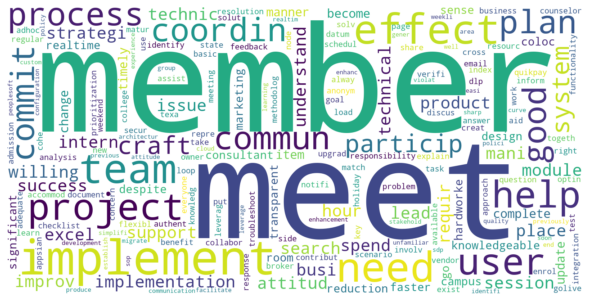

In [68]:
# import the new one
from PIL import Image
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 


#Function to generate the wordcloud to determine most common words in the project reports
def generateWordCloud(data):
  drive.mount('/content/gdrive')
  file_list = os.listdir('/content/gdrive/My Drive/Colab Notebooks')
  #filenames = os.listdir('https://github.com/NikhithaKunati/Applies_NLP_on_Project_Management/tree/master/*.docx')
  print(file_list)
  os.chdir('/content/gdrive/My Drive/Colab Notebooks')
  bulb_mask = nump.array(Image.open("/content/gdrive/My Drive/Colab Notebooks/bulb_mask.png"))

  text = ' '.join(data['Lemmatized'])
  
  wc = WordCloud(background_color="white", max_words = 200, width=1600, height=800).generate(text)
  return wc


#Ploting and prnting results of above generated wordcloud with specific dimensions
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(generateWordCloud(datafr), interpolation= 'bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("factors_m.png")

plt.show()
